# SQL

**S**tructured **Q**uery **L**anguage _(SQL)_ is the standard language for interacting with relation databases.

The most popular database management systems: MySQL, Microsoft SQL server, PostgreSQL, SQLite, ...

## Difference
MySQL, PostgreSQL & SQLite use very similar syntax, with some notable differences highlighted below. 

MySQL | PostgreSQL | SQLite
---|--|---
x = 'Celia' <=> x = 'celia' | x = 'Celia' != x = 'celia' | x = 'Celia' != x = 'celia'
x = 'celia' or x = "celia" | x = 'celia' only | x = 'celia' or x = "celia"

- Comparison operators : `=`, `<`, `>`, `<=`, `>=`, `!=`, `<>`. `AND` and `OR` operators.
- `WHERE` s'applique sur chaque ligne et avant l'application de GROUP BY. Alors que, HAVING crée une condition sur un groupe de lignes GROUP BY.
- `ORDER BY ACS` (by default) or `DESC`.
- `Count`: Permet de compter le nb de ligne et retourne le nbr de valeurs différentes de null de colonne
- IN s'utilise avec `WHERE`.
- `LIKE xx%xx`: Search many characters, `LIKE xx_xx`: one character.
- `Column BETWEEN min AND max` <=> `colonne >= min AND colonne <= max` (BETWEEN more clear).
- `UNION`, même colonne dans les deux tables
- Join
 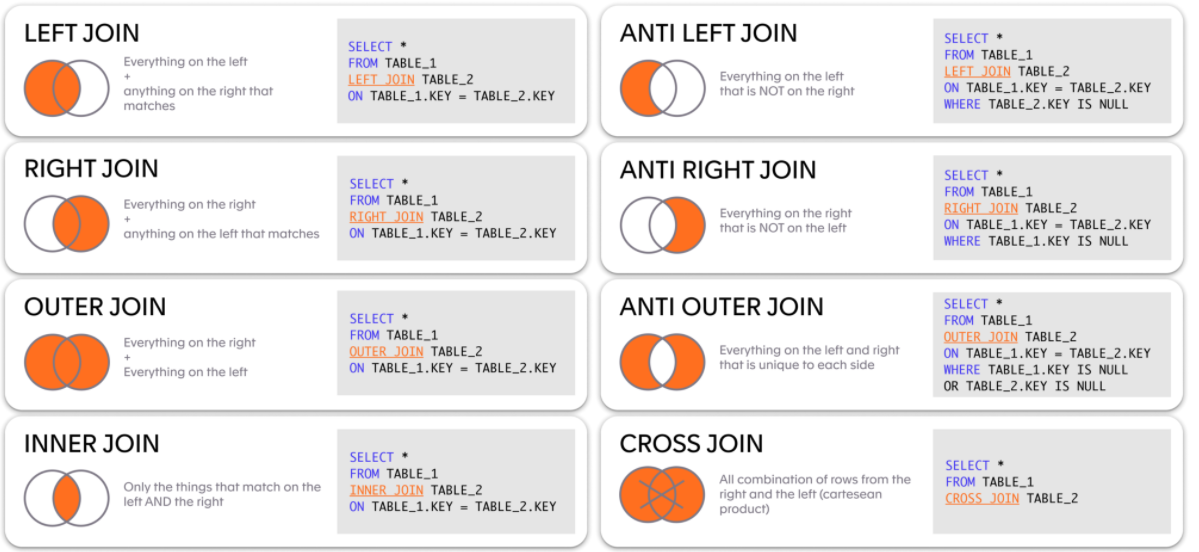
- `CASE`

```SQL
CASE a --Les valeurs contenues dans la colonne 'a' sont comparé à 1, 2
    WHEN 1 THEN 'un'
    WHEN 2 THEN 'deux'
    ELSE 'autre'
END

-- OR

CASE 
    WHEN a=1 THEN 'un'
    WHEN a=2 THEN 'deux'
    ELSE 'autre'
END
```
- Some = Any (plus grand/petit qu'au moins un)
- All (plus grand/petit de tout les produits)
- `COALEASE`: Returns the first non-null value in a list: `SELECT COALESCE(NULL, NULL, NULL, 'W3Schools.com', NULL, 'Example.com');`

### SQL rank functions


In the SQL RANK functions, we use the OVER() clause to define a set of rows in the result set. We can also use SQL PARTITION BY clause to define a subset of data in a partition. You can also use Order by clause to sort the results in a descending or ascending order.

Dummy dataset:
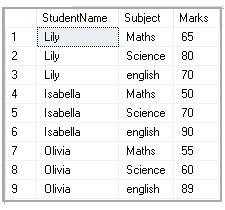

### 1. ROW_Number() SQL RANK function

We use ROW_Number() function to get a unique sequential number for each row in the specified data. 
We get different ranks for the row having similar values as well.


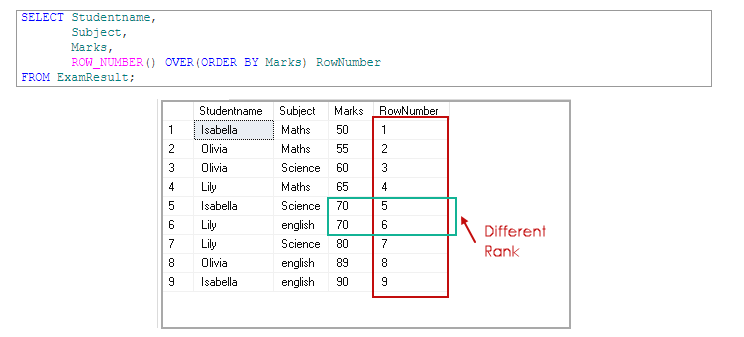

### 2. DENSE_RANK()

We use DENSE_RANK() function to specify a unique rank number within the partition as per the specified column value. If we have duplicate values, it gives the same rank for duplicate or similar values.

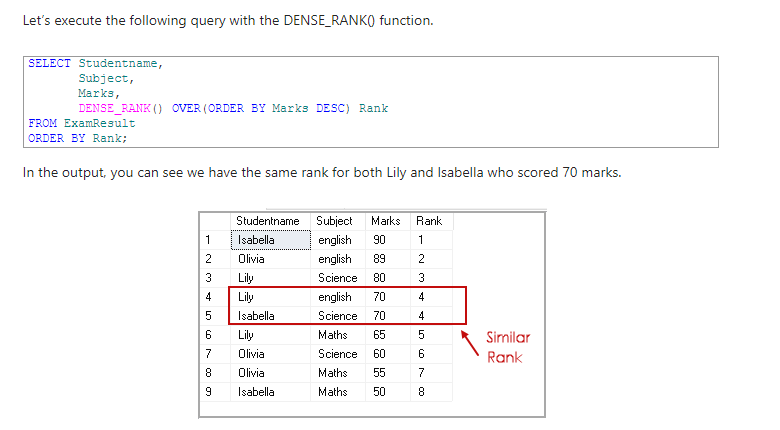

Let’s use DENSE_RANK function in combination with the SQL PARTITION BY clause:

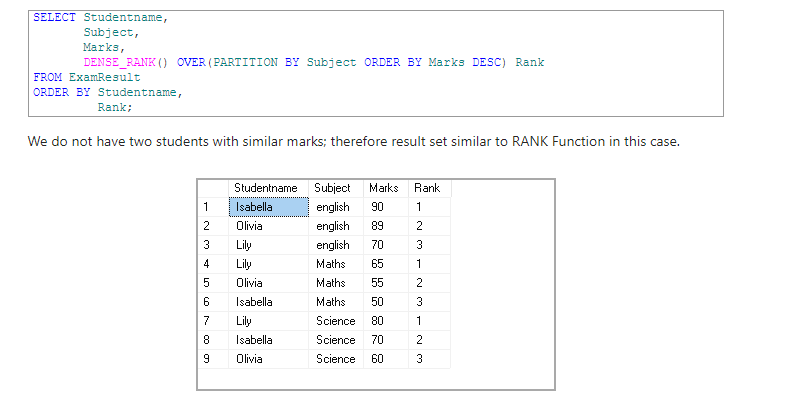

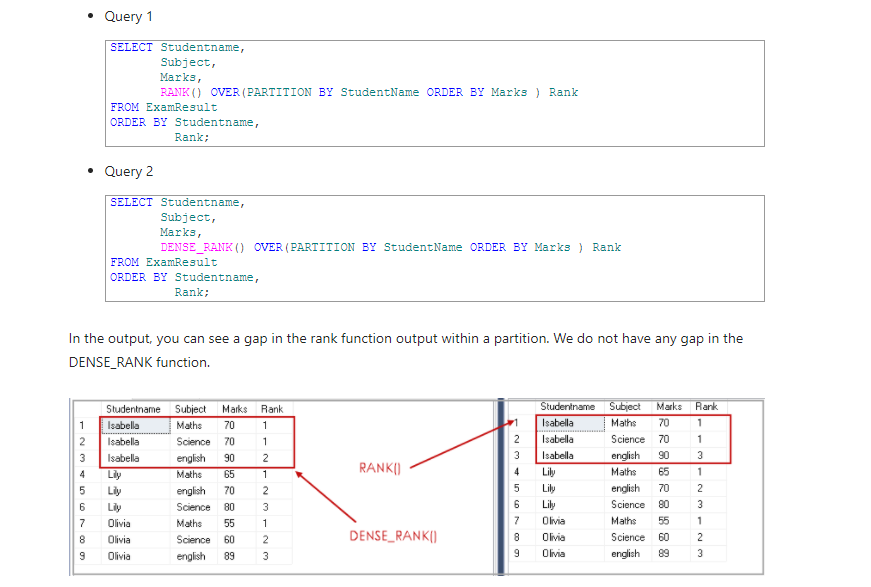

## Some queries


```SQL
SELECT first_name, last_name 
FROM actor
WHERE first_name = 'Nick' 
    AND title LIKE '%Truman%';

SELECT DISTINCT rating  
FROM film;

-- Number of rows
SELECT COUNT(title) 
FROM film; 

SELECT COUNT(DISTINCT(rental_rate)) 
FROM film;

-- ORDER BY
SELECt rental_id, customer_id, return_date 
FROM rental
WHERE customer_id IN [3, 6]
ORDER BY renturn_date;

SELECt rental_id 
FROM rental 
WHERE customer_id IN (3, 6)
ORDER BY last_name ASC, first_name DESC

-- AGGREATION
SELECt ROUND(AVG(amount), 1) as average_amout FROM payment; 

SELECT customer_id, COUNT(*) FROM rental:
GROUP BY customer_id
ORDER BY COUNT(*) DESC;

SELECT stuff_id, COUNT(amout), SUM(amount)  
FROM payment:
GROUP BY stuff_id
ORDER BY stuff_id DESC
LIMIT 3;

-- Client qui ont dépensé plus de 500 $
SELECT customer_id, COUNT(amout), SUM(amount)  FROM payment:
GROUP BY customer_id
HAVING BY SUM(amount) > 500;

-- Client qui ont dépensé plus de 500 $
SELECT rating, ROUND(AVG(rental_rate), 2)
FROM film
-- Avant GROUP BY
WHERE rating IN ('R', 'G', 'PG')
GROUP BY rating
HAVING BY AVG(rental_rate) > 2.9;

-- L acteur le plus représenté dans les films de ce magasin
SELECT a.first_name, a.last_name, SUM(f.title)
FROM acteur AS a
INNER JOIN film_actor AS fa ON a.actor_id = fa.actor_id
INNER JOIN film AS f  ON fa.film_id = f.film_id
GROUP BY a.actor_id
ORDER BY SUM(f.title) DESC;

-- Client qui ont loué au moins 38 films 
SELECT c.first_name, COUNT(r.rental_id)
FROM customer AS c
INNER JOIN rental AS r 
    ON c.customer_id = r.customer_id 
INNER JOIN rental AS r 
    ON c.customer_id = r.customer_id 
GROUP BY c.customer_id
HAVING COUNT(r.rental_id) >= 30

-- Quelle catégorie a le plus de location
SELECT c.name AS category, COUNT(r.rental_id)
FROM category AS c
INNER JOIN film_category AS fc 
    ON c.category_id = fc.category_id
INNER JOIN film AS f 
    ON fc.film_id = f.film_id
INNER JOIN inventory AS i 
    ON f.film_id = i.film_id
INNER JOIN rental AS r 
    ON r.inventory_id = i.inventory_id
WHERE name NOT IN ('ANIMATION', 'COMEDY')
GROUP BY name
ORDER BY COUNT(r.rental_id)
ORDER BY COUNT(r.rental_id) DESC;

--  Titre de film de langue anglaise qui ont eu plus de 30 location
SELECT f.title, SUM(r.rental_id)
FROM languages AS l
INNER JOIN film AS f 
    ON f.language_id = l.language_id
INNER JOIN film AS f 
    ON fc.film_id = f.film_id
INNER JOIN inventory AS i 
    ON f.film_id = i.film_id
INNER JOIN rental AS r 
    ON r.inventory_id = i.inventory_id
WHERE l.name = 'ENGLISH'
GROUP BY f.title
HAVING BY SUM(r.rental_id) >= 30;

-- Les films qui rapportent le plus
-- Revenu(film) = Prix_location * Nbr_location
SELECT title, COUNT(rental_rate) AS nb_rentals, COUNT(rental_id) * rental_rate AS revenue
FROM film as f
INNER JOIN iventory AS i 
    ON f.film_id = i.film_id
INNER JOIN rental AS r i.inventory_id = r.iventory_id
GROUP BY title, rental_rate;

--- Tableau ACHAT, Colonnes: ID, NOM, MARGE, ...
--- Requète qui va afficher un message personnalisé en fonction de la valeur de la marge.
SELECT id, nom, marge
    CASE 
        WHEN marge = 1 THEN 'prix ordinaire'
        WHEN marge > 1 THEN 'prix supérieur à la normale'
        ELSE 'Prix inférieur à la normale'
    END AS marge_description 
FROM ACHAT
-- Crer une colonne CASE...

SELECT id, nom, quantité
    CASE quantité
        WHEN 1  THEN 'Offre de -5%'
        WHEN 2  THEN 'Offre de -8%'
        ELSE '-10% pour le prochain article'
    END AS promotions
FROM ACHAT
```